# Load

In this exercise, you'll load data into different formats: a csv file, a json file, and a SQLite database.

You'll work with the GDP, population, and projects data. Run the code cell below to read in and clean the World Bank population and gdp data. This code creates a dataframe called df_indicator with both the gdp and population data.

In [2]:
# run this code cell - there is nothing for you to do in this code cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('../data/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)

population = pd.read_csv('../data/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name', 'Country Code'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby(['Country Name', 'Country Code'])['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name', 'Country Code'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_indicator = gdp_melt.merge(population_melt, on=('Country Name', 'Country Code', 'year'))

# filter out values that are not countries
non_countries = ['World',
                 'High income',
                 'OECD members',
                 'Post-demographic dividend',
                 'IDA & IBRD total',
                 'Low & middle income',
                 'Middle income',
                 'IBRD only',
                 'East Asia & Pacific',
                 'Europe & Central Asia',
                 'North America',
                 'Upper middle income',
                 'Late-demographic dividend',
                 'European Union',
                 'East Asia & Pacific (excluding high income)',
                 'East Asia & Pacific (IDA & IBRD countries)',
                 'Euro area',
                 'Early-demographic dividend',
                 'Lower middle income',
                 'Latin America & Caribbean',
                 'Latin America & the Caribbean (IDA & IBRD countries)',
                 'Latin America & Caribbean (excluding high income)',
                 'Europe & Central Asia (IDA & IBRD countries)',
                 'Middle East & North Africa',
                 'Europe & Central Asia (excluding high income)',
                 'South Asia (IDA & IBRD)',
                 'South Asia',
                 'Arab World',
                 'IDA total',
                 'Sub-Saharan Africa',
                 'Sub-Saharan Africa (IDA & IBRD countries)',
                 'Sub-Saharan Africa (excluding high income)',
                 'Middle East & North Africa (excluding high income)',
                 'Middle East & North Africa (IDA & IBRD countries)',
                 'Central Europe and the Baltics',
                 'Pre-demographic dividend',
                 'IDA only',
                 'Least developed countries: UN classification',
                 'IDA blend',
                 'Fragile and conflict affected situations',
                 'Heavily indebted poor countries (HIPC)',
                 'Low income',
                 'Small states',
                 'Other small states',
                 'Not classified',
                 'Caribbean small states',
                 'Pacific island small states']


# remove non countries from the data
df_indicator  = df_indicator[~df_indicator['Country Name'].isin(non_countries)]
df_indicator.reset_index(inplace=True, drop=True)

df_indicator.columns = ['countryname', 'countrycode', 'year', 'gdp', 'population']

# output the first few rows of the data frame
df_indicator.head()

,countryname,countrycode,year,gdp,population
0,Aruba,ABW,1960,1.916242e+09,54211.0
1,Afghanistan,AFG,1960,5.377778e+08,8996351.0
2,Angola,AGO,1960,1.857319e+10,5643182.0
3,Albania,ALB,1960,1.857319e+10,1608800.0
4,Andorra,AND,1960,1.857319e+10,13411.0


Run this code cell to read in the countries data set. This will create a data frame called df_projects containing the World Bank projects data. The data frame only has the 'id', 'countryname', 'countrycode', 'totalamt', and 'year' columns.

In [3]:
# run this code cell - there is nothing for you to do here 

!pip install pycountry
from pycountry import countries

# read in the projects data set with all columns type string
df_projects = pd.read_csv('../data/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

df_projects['countryname'] = df_projects['countryname'].str.split(';').str.get(0)

# set up the libraries and variables
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['countryname'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        country_not_found.append(country)
        
# run this code cell to load the dictionary

country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

project_country_abbrev_dict.update(country_not_found_mapping)

df_projects['countrycode'] = df_projects['countryname'].apply(lambda x: project_country_abbrev_dict[x])

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])

df_projects['year'] = df_projects['boardapprovaldate'].dt.year.astype(str).str.slice(stop=4)

df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))

df_projects = df_projects[['id', 'countryname', 'countrycode', 'totalamt', 'year']]

df_projects.head()

,id,countryname,countrycode,totalamt,year
0,P162228,World,WLD,0,2018
1,P163962,Democratic Republic of the Congo,COD,200000000,2018
2,P167672,People's Republic of Bangladesh,BGD,58330000,2018
3,P158768,Islamic Republic of Afghanistan,AFG,20000000,2018
4,P161364,Federal Republic of Nigeria,NGA,100000000,2018


# Exercise Part 1

The first few cells in this workbook loaded and cleaned the World Bank Data. You now have two data frames:
* df_projects, which contain data from the projects data set
* df_indicator, which contain population and gdp data for various years

They both have country code variables. Note, however, that there could be countries represented in the projects data set that are not in the indicator data set and vice versus.

In this first exercise, merge the two data sets together using country code and year as common keys. When joining the data sets, keep all of the data in the df_projects dataframe even if there is no indicator data for that country code.

In [4]:
df_projects.shape,df_indicator.shape

((18248, 5), (12586, 5))

In [5]:
# merge the projects and indicator data frames together using countrycode and year as common keys
# Use a left join so that all projects are returned even if the country/year combination does not have 
# indicator data

df_merged = pd.merge(df_projects, df_indicator, how='left', on=['countrycode','year'])
df_merged.shape

(18248, 8)

In [6]:
df_merged.head()

,id,countryname_x,countrycode,totalamt,year,countryname_y,gdp,population
0,P162228,World,WLD,0,2018,NaN,NaN,NaN
1,P163962,Democratic Republic of the Congo,COD,200000000,2018,NaN,NaN,NaN
2,P167672,People's Republic of Bangladesh,BGD,58330000,2018,NaN,NaN,NaN
3,P158768,Islamic Republic of Afghanistan,AFG,20000000,2018,NaN,NaN,NaN
4,P161364,Federal Republic of Nigeria,NGA,100000000,2018,NaN,NaN,NaN


If you look at the first few rows of the merged data set, you'll see NaN's for the indicator data. That is because the indicator data does not contain values for 2018. If you run the code cell below, you should get the following results:


||id | countryname_x	| countrycode	|totalamt	|year	|countryname_y	|gdp	| population|
|-|-|-|-|-|-|-|
|256|	P161982|	Hashemite Kingdom of Jordan|	JOR|	0|	2017|	Jordan	|4.006831e+10|	9702353.0|
|301|	P162407|	Hashemite Kingdom of Jordan|	JOR|	147700000|	2017|	Jordan|	4.006831e+10|	9702353.0|
|318|	P160103|	Hashemite Kingdom of Jordan|	JOR|	0|	2017|	Jordan	|4.006831e+10	|9702353.0|
|464|	P161905|	Hashemite Kingdom of Jordan|	JOR|	50000000|	2017	|Jordan	|4.006831e+10	|9702353.0|
|495|	P163387|	Hashemite Kingdom of Jordan|	JOR|	36100000|	2017	|Jordan	|4.006831e+10	|9702353.0|
|515|	P163241|	Hashemite Kingdom of Jordan|	JOR|	0|	2017|	Jordan|	4.006831e+10|	9702353.0|

In [7]:
# Run this code to check your work
df_merged[(df_merged['year'] == '2017') & (df_merged['countryname_y'] == 'Jordan')]

,id,countryname_x,countrycode,totalamt,year,countryname_y,gdp,population
256,P161982,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0
301,P162407,Hashemite Kingdom of Jordan,JOR,147700000,2017,Jordan,4.006831e+10,9702353.0
318,P160103,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0
464,P161905,Hashemite Kingdom of Jordan,JOR,50000000,2017,Jordan,4.006831e+10,9702353.0
495,P163387,Hashemite Kingdom of Jordan,JOR,36100000,2017,Jordan,4.006831e+10,9702353.0
515,P163241,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0


In [8]:
import matplotlib.pyplot as plt

Text(0,0.5,'number of projects')

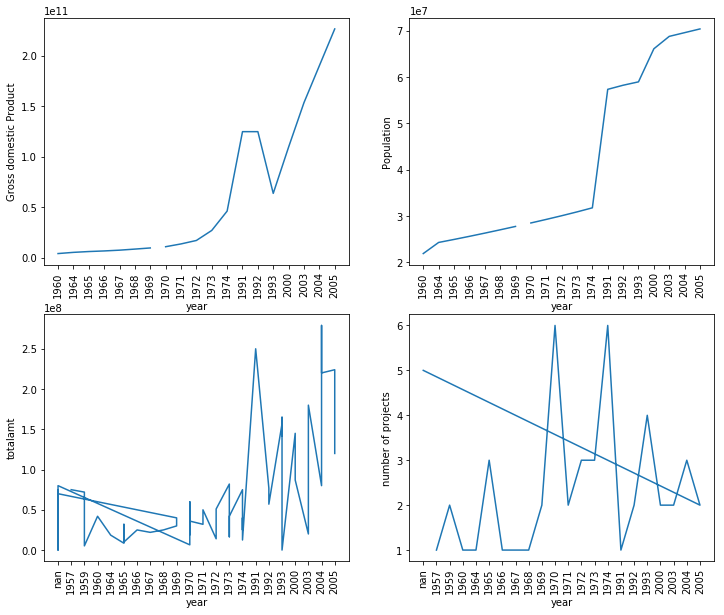

In [11]:
plt.figure(figsize= [12,10])

plt.subplot(2, 2, 1)
y = df_merged.loc[df_merged.countrycode.str.contains('IRN')].gdp
x = df_merged.loc[df_merged.countrycode.str.contains('IRN')].year
plt.errorbar(x,y)
plt.xticks(rotation=90);
plt.xlabel('year')
plt.ylabel('Gross domestic Product')

plt.subplot(2, 2, 2)
y = df_merged.loc[df_merged.countrycode.str.contains('IRN')].population
x = df_merged.loc[df_merged.countrycode.str.contains('IRN')].year
plt.errorbar(x,y)
plt.xticks(rotation=90);
plt.xlabel('year')
plt.ylabel('Population')


plt.subplot(2, 2, 3)
y = df_merged.loc[df_merged.countrycode.str.contains('IRN')].totalamt
x = df_merged.loc[df_merged.countrycode.str.contains('IRN')].year
plt.errorbar(x,y)
plt.xticks(rotation=90);
plt.xlabel('year')
plt.ylabel('totalamt')


plt.subplot(2, 2, 4)
y = df_merged.loc[df_merged.countrycode.str.contains('IRN')].groupby('year').size().values

x = df_merged.loc[df_merged.countrycode.str.contains('IRN')].groupby('year').size().index

plt.errorbar(x,y)
plt.xticks(rotation=90);
plt.xlabel('year')
plt.ylabel('number of projects')


# Exercise Part 2

Output the df_merged dataframe as a json file. You can use the pandas [to_json() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html).

In [13]:
# Output the df_merged data frame as a json file
# HINT: Pandas has a to_json() method
# HINT: use orient='records' to get one of the more common json formats
# HINT: be sure to specify the name of the json file you want to create as the first input into to_json

df_merged.to_json('../data/countrydata.json', orient='records')

you can see in the data folder, the json file you created.

The records should look like this (note that the order of the records might be different, but the format should look similar):
```
[{"id":"P162228","countryname_x":"World","countrycode":"WLD","totalamt":0,"year":"2018","countryname_y":null,"gdp":null,"population":null},{"id":"P163962","countryname_x":"Democratic Republic of the Congo","countrycode":"COD","totalamt":200000000,"year":"2018","countryname_y":null,"gdp":null,"population":null},{"id":"P167672","countryname_x":"People's Republic of Bangladesh","countrycode":"BGD","totalamt":58330000,"year":"2018","countryname_y":null,"gdp":null,"population":null},{"id":"P158768","countryname_x":"Islamic  Republic of Afghanistan","countrycode":"AFG","totalamt":20000000,"year":"2018","countryname_y":null,"gdp":null,"population":null},{"id":"P161364","countryname_x":"Federal Republic of Nigeria","countrycode":"NGA","totalamt":100000000,"year":"2018","countryname_y":null,"gdp":null,"population":null},{"id":"P161483","countryname_x":"Republic of Tunisia","countrycode":"TUN","totalamt":500000000,"year":"2018","countryname_y":null,"gdp":null,"population":null}
```



# Exercise Part 3

Output the df_merged dataframe as a csv file. You can use the pandas [to_csv() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html).

In [14]:
# output the df_merged data frame as a csv file
# HINT: The to_csv() method is similar to the to_json() method.
# HINT: If you do not want the data frame indices in your result, use index=False

df_merged.to_csv('../data/countrydata.csv',index=False)

you can see in the data folder, the csv file you created.

The records should look something like this:
```
id,countryname_x,countrycode,totalamt,year,countryname_y,gdp,population
P162228,World,WLD,0,2018,,,
P163962,Democratic Republic of the Congo,COD,200000000,2018,,,
P167672,People's Republic of Bangladesh,BGD,58330000,2018,,,
P158768,Islamic  Republic of Afghanistan,AFG,20000000,2018,,,
P161364,Federal Republic of Nigeria,NGA,100000000,2018,,,
P161483,Republic of Tunisia,TUN,500000000,2018,,,
P161885,Federal Republic of Nigeria,NGA,350000000,2018,,,
P162069,Federal Republic of Nigeria,NGA,225000000,2018,,,
P163540,Federal Republic of Nigeria,NGA,125000000,2018,,,
P163576,Lebanese Republic,LBN,329900000,2018,,,
P163721,Democratic Socialist Republic of Sri Lan,LKA,200000000,2018,,,
P164082,Federal Republic of Nigeria,NGA,400000000,2018,,,
P164783,Nepal,NPL,0,2018,,,
```

    

# Exercise Part 4

Output the df_merged dataframe as a sqlite database file. For this exercise, you can put all of the data as one table. In the next exercise, you'll create a database with multiple tables. 

In [17]:
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('../data/worldbank.db')

#  output the df_merged dataframe to a SQL table called 'merged'.
# HINT: Use the to_sql() method
# HINT: Use the conn variable for the connection parameter
# HINT: You can use the if_exists parameter like if_exists='replace' to replace a table if it already exists

df_merged.to_sql('merged',conn,if_exists='replace')

Run the code cell below to make sure that the worldbank.db file was created and the merged table loaded.

In [18]:
pd.read_sql('SELECT * FROM merged WHERE  countrycode = "IRN" ', conn).head()

,index,id,countryname_x,countrycode,totalamt,year,countryname_y,gdp,population
0,6807,P071170,Islamic Republic of Iran,IRN,120000000,2005,"Iran, Islamic Rep.",2.264521e+11,70421811.0
1,6808,P076884,Islamic Republic of Iran,IRN,224000000,2005,"Iran, Islamic Rep.",2.264521e+11,70421811.0
2,7023,P088060,Islamic Republic of Iran,IRN,220000000,2004,"Iran, Islamic Rep.",1.900434e+11,69617100.0
3,7228,P071191,Islamic Republic of Iran,IRN,279000000,2004,"Iran, Islamic Rep.",1.900434e+11,69617100.0
4,7231,P073433,Islamic Republic of Iran,IRN,80000000,2004,"Iran, Islamic Rep.",1.900434e+11,69617100.0


# Exercise Part 5

Output the data to a SQL database like in the previous exercise; however, this time, put the df_indicator data in one table and the df_projects data in another table. Call the df_indicator table 'indicator' and the df_projects table 'projects'.

In [19]:
# the database file will be worldbank.db

# output the df_merged dataframe to a SQL table called 'merged'.
# HINT: Use the to_sql() method
# HINT: Use the conn variable for the connection parameter
# HINT: You can use the if_exists parameter like if_exists='replace' to replace a table if it already exists
df_indicator.to_sql('indicator', if_exists='replace',con=conn)

df_projects.to_sql('projects', if_exists='replace', con=conn)

Run the code cell below to see if your code is working properly. The code cell below runs a SQL query against the worldbank.db database joining the indicator table with the projects table.

In [20]:
pd.read_sql('SELECT * FROM projects LEFT JOIN indicator ON \
            projects.countrycode = indicator.countrycode AND \
            projects.year = indicator.year', conn).head()


,index,id,countryname,countrycode,totalamt,year,index,countryname,countrycode,year,gdp,population
0,0,P162228,World,WLD,0,2018,NaN,None,None,None,NaN,NaN
1,1,P163962,Democratic Republic of the Congo,COD,200000000,2018,NaN,None,None,None,NaN,NaN
2,2,P167672,People's Republic of Bangladesh,BGD,58330000,2018,NaN,None,None,None,NaN,NaN
3,3,P158768,Islamic Republic of Afghanistan,AFG,20000000,2018,NaN,None,None,None,NaN,NaN
4,4,P161364,Federal Republic of Nigeria,NGA,100000000,2018,NaN,None,None,None,NaN,NaN


In [21]:
pd.read_sql('SELECT * FROM projects LEFT JOIN indicator on\
            projects.countrycode =  indicator.countrycode AND \
            projects.year = indicator.year WHERE projects.countrycode ="IRN" ',conn).head()

,index,id,countryname,countrycode,totalamt,year,index,countryname,countrycode,year,gdp,population
0,6807,P071170,Islamic Republic of Iran,IRN,120000000,2005,9856.0,"Iran, Islamic Rep.",IRN,2005,2.264521e+11,70421811.0
1,6808,P076884,Islamic Republic of Iran,IRN,224000000,2005,9856.0,"Iran, Islamic Rep.",IRN,2005,2.264521e+11,70421811.0
2,7023,P088060,Islamic Republic of Iran,IRN,220000000,2004,9639.0,"Iran, Islamic Rep.",IRN,2004,1.900434e+11,69617100.0
3,7228,P071191,Islamic Republic of Iran,IRN,279000000,2004,9639.0,"Iran, Islamic Rep.",IRN,2004,1.900434e+11,69617100.0
4,7231,P073433,Islamic Republic of Iran,IRN,80000000,2004,9639.0,"Iran, Islamic Rep.",IRN,2004,1.900434e+11,69617100.0


In [22]:
# commit any changes to the database and close the connection to the database
conn.commit()
conn.close()

# Exercise Part 6 

SQLite, as its name would suggest, is somewhat limited in its functionality. For example, the Alter Table command only allows you to change a table name or to add a new column to a table. You can't, for example, add a primary key to a table once the table is already created.

If you want more control over a sqlite3 database, it's better to use the sqlite3 library directly. Here is an example of how to use the sqlite3 library to create a table in the database, insert a value, and then run a SQL query on the database. Run the code cells below to see the example.

### Demo

In [23]:
# connect to the data base
conn = sqlite3.connect('../data/worldbank2.db')

# get a cursor
cur =  conn.cursor()


# drop the test table in case it already exists
cur.execute("DROP TABLE IF EXISTS test ")

# create the test table including project_id as a primary key
cur.execute("CREATE TABLE test (project_id TEXT PRIMERY KEY, countryname TEXT, countrycode TEXT, totalamt REAL, year INTEGER);")

# insert a value into the test table
cur.execute("INSERT INTO test \
                (project_id, countryname, countrycode, totalamt, year) \
         VALUES ('a','Brazil', 'BRA', '100,000', 1970 );")

# commit changes made to the database
conn.commit()

# select all from the test table
cur.execute("SELECT * FROM test")
cur.fetchall()

[('a', 'Brazil', 'BRA', '100,000', 1970)]

In [24]:
# commit any changes and close the data base
conn.close()

### Exercise

Use the sqlite3 library to connect to the worldbank.db database. Then: 
* Create a table, called projects, for the projects data where the primary key is the id of each project. 
* Create another table, called gdp, that contains the gdp data. 
* And create another table, called population, that contains the population data.

Here is the schema for each table.
##### projects

* project_id text 
* countryname text 
* countrycode text
* totalamt real
* year integer

project_id is the primary key

##### gdp
* countryname text
* countrycode text
* year integer
* gdp real

(countrycode, year) is the primary key

##### population
* countryname text
* countrycode text
* year integer
* population integer

(countrycode, year) is the primary key

After setting up the tables, write code that inserts the data into each table. (Note that this database is not normalized. For example, countryname and countrycode are in all three tables. You could make another table with countrycode and countryname and then create a foreign key constraint in the projects, gdp, and population tables. If you'd like an extra challenge, create a country table with countryname and countrycode. Then create the other tables with foreign key constraints).

Follow the TODOs in the next few code cells to finish the exercise.

In [25]:
# connect to the data base
conn = sqlite3.connect('../data/worldbank2.db')


# get a cursor
cur = conn.cursor()

# drop tables created previously to start fresh
cur.execute("DROP TABLE IF EXISTS test")
cur.execute("DROP TABLE IF EXISTS indicator")
cur.execute("DROP TABLE IF EXISTS projects")
cur.execute("DROP TABLE IF EXISTS gdp")
cur.execute("DROP TABLE IF EXISTS population")

# create the projects table including project_id as a primary key
# HINT: Use cur.execute("SQL Query")
cur.execute("CREATE TABLE projects (project_id TEXT PRIMARY KEY, countryname TEXT, countrycode TEXT, totalamt REAL, year INTEGER);")

# create the gdp table including (countrycode, year) as primary key
# HINT: To create a primary key on multiple columns, you can do this:
# CREATE TABLE tablename (columna datatype, columnb datatype, columnc dataype, PRIMARY KEY (columna, columnb));
cur.execute("CREATE TABLE gdp (countryname TEXT, countrycode TEXT, year INTEGER, gdp REAL, PRIMARY KEY (countrycode, year));")

# create the population table including (countrycode, year) as primary key
cur.execute('CREATE TABLE population (countryname TEXT, countrycode TEXT, year INTEGER, population REAL, PRIMARY KEY(countrycode, year));')

# commit changes to the database. Do this whenever modifying a database
conn.commit()

In [26]:
# insert project values into the projects table
# HINT: Use a for loop with the pandas iterrows() method
# HINT: The iterrows() method returns two values: an index for each row and a tuple of values
# HINT: Some of the values for totalamt and year are NaN. Because you've defined
# year and totalamt as numbers, you cannot insert NaN as a value into those columns.
# When totaamt or year equal NaN, you'll need to change the value to something numeric
# like, for example, zero
for index , values in df_projects.iterrows():
    project_id, countryname, countrycode, totalamt, year = values
    
    if totalamt == 'nan':
        totalamt = 0
    if year == 'nan':
        year = 0
    sql_string = 'INSERT  INTO projects (project_id, countryname ,countrycode ,totalamt ,year) VALUES("{}", "{}", "{}", {}, {});'.format(project_id, countryname, countrycode, totalamt, year)
    cur.execute(sql_string)
# commit changes to the dataset after any changes are made
conn.commit()

In [27]:
# insert gdp values into the gdp table
for index , values in df_indicator[['countryname', 'countrycode', 'year', 'gdp']].iterrows():

    countryname, countrycode, year, gdp  = values
        
    sql_string = 'INSERT  INTO gdp (countryname, countrycode ,year ,gdp) VALUES("{}", "{}", {}, {});'.format( countryname, countrycode, year, gdp)
    cur.execute(sql_string)
# commit changes to the dataset after any changes are made
conn.commit()


In [28]:
# insert population values into the population table
for index, values in df_indicator[['countryname', 'countrycode', 'year', 'population']].iterrows():
    countryname, countrycode, year, population = values

    sql_string = 'INSERT INTO population (countryname, countrycode, year, population) VALUES ("{}", "{}", {}, {});'.format( countryname, countrycode, year, population)
    cur.execute(sql_string)    
# commit changes to the dataset after any changes are made
conn.commit()

In [29]:
# run this command to see if your tables were loaded as expected
#sql_query = "SELECT * FROM projects JOIN gdp JOIN population on projects.year = gdp.year AND projects.countrycode = gdp.countrycode AND projects.countrycode = population.countrycode AND projects.year = population.year;"
sqlquery = "SELECT * FROM projects JOIN gdp JOIN population ON projects.year = gdp.year AND projects.countrycode = gdp.countrycode AND projects.countrycode = population.countrycode AND projects.year=population.year;"
result = pd.read_sql(sqlquery, con=conn)
result.shape

(15537, 13)

In [30]:
result.head()

,project_id,countryname,countrycode,totalamt,year,countryname,countrycode,year,gdp,countryname,countrycode,year,population
0,P161982,Hashemite Kingdom of Jordan,JOR,0.0,2017,Jordan,JOR,2017,4.006831e+10,Jordan,JOR,2017,9.702353e+06
1,P161588,Republic of Indonesia,IDN,0.0,2017,Indonesia,IDN,2017,1.015539e+12,Indonesia,IDN,2017,2.639914e+08
2,P161703,Islamic Republic of Pakistan,PAK,0.0,2017,Pakistan,PAK,2017,3.049518e+11,Pakistan,PAK,2017,1.970160e+08
3,P146936,Republic of India,IND,40000000.0,2017,India,IND,2017,2.597491e+12,India,IND,2017,1.339180e+09
4,P157343,Republic of Ghana,GHA,200000000.0,2017,Ghana,GHA,2017,4.733002e+10,Ghana,GHA,2017,2.883363e+07


If everything went well, the code above should output (15558, 13) as the shape of the resulting data frame.

In [31]:
# commit any changes and close the database
conn.commit()
conn.close()

# Conclusion

Once you have extracted data and transformed it, the final step is to load the data into storage. In this exercise, you stored results into a csv file, a json file, and a SQLite database.